In [2]:
#imports
import chess.pgn
import numpy as np
import pandas as pd
import missingno as mso
import ast
from evals_calc import evaluate_performance # Import the evaluate_performance function

Create a dataframe based on a pgn file

In [5]:
def parse_pgn(pgn_file):
    
    # Open and read the PGN file
    with open(pgn_file, 'r') as f:
        
        games = []
        for game in iter(lambda: chess.pgn.read_game(f), None):
            
            board = game.board() # Create a board for this game to convert the moves from UCI format to normal notation

            # Extract metadata
            event = game.headers.get("Event", "")
            site = game.headers.get("Site", "")
            white_player = game.headers.get("White", "")
            black_player = game.headers.get("Black", "")
            result = game.headers.get("Result", "")
            utc_date = game.headers.get("UTCDate", "")
            utc_time = game.headers.get("UTCTime", "")
            white_elo = game.headers.get("WhiteElo", "")
            black_elo = game.headers.get("BlackElo", "")
            white_rating_diff = game.headers.get("WhiteRatingDiff", "")
            black_rating_diff = game.headers.get("BlackRatingDiff", "")
            eco = game.headers.get("ECO", "")
            opening = game.headers.get("Opening", "")
            time_control = game.headers.get("TimeControl", "")
            termination = game.headers.get("Termination", "")
            
            # Get moves, it gets them in UCI format we need to convert them to standard notation
            moves = []
            
            for move in game.mainline_moves(): 
                moves.append(board.san(move))
                board.push(move)
                            
            # Evaluate the performance of both players
            white_perf, black_perf = evaluate_performance(game)

            # Create a dictionary forr game data
            game_data = {
                "Event": event,
                "Site": site,
                "White": white_player,
                "Black": black_player,
                "Result": result,
                "UTCDate": utc_date,
                "UTCTime": utc_time,
                "WhiteElo": white_elo,
                "BlackElo": black_elo,
                "WhiteRatingDiff": white_rating_diff,
                "BlackRatingDiff": black_rating_diff,
                "ECO": eco,
                "Opening": opening,
                "TimeControl": time_control,
                "Termination": termination,
                "Moves": moves,
                "White_Performance": round(white_perf),
                "Black_Performance": round(black_perf)
            }

            # Append game data to the games list
            games.append(game_data)

    # Create a DataFrame from the list of games
    df = pd.DataFrame(games)
    return df

# Parse the PGN file and create the DataFrame
df = parse_pgn("D:\Proyectos\FinalProjectTest\Proyecto-Final\Data\Raw\lichess_db_standard_rated_2013-01.pgn")

#Convert the resulting dataframe into a CSV file
df.to_csv("../Data/Raw/raw_matches.csv")

In [3]:
df = pd.read_csv("../Data/Raw/raw_matches.csv")

# Display the DataFrame
df

,Unnamed: 0,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,White_Performance,Black_Performance
0,0,Rated Classical game,https://lichess.org/j1dkb5dw,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,5.0,-8.0,C00,French Defense: Normal Variation,600+8,Normal,"['e4', 'e6', 'd4', 'b6', 'a3', 'Bb7', 'Nc3', '...",47,53
1,1,Rated Classical game,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,1-0,2012.12.31,23:04:12,1654,1919,19.0,-22.0,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,"['d4', 'd5', 'Nf3', 'Nf6', 'e3', 'Bf5', 'Nh4',...",45,55
2,2,Rated Classical game,https://lichess.org/szom2tog,Kozakmamay007,VanillaShamanilla,1-0,2012.12.31,23:03:15,1643,1747,13.0,-94.0,C50,Four Knights Game: Italian Variation,420+17,Normal,"['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Nf6', 'Nc3'...",47,53
3,3,Rated Bullet game,https://lichess.org/rklpc7mk,Naitero_Nagasaki,800,0-1,2012.12.31,23:04:57,1824,1973,-6.0,8.0,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,"['e4', 'c6', 'Nc3', 'd5', 'Qf3', 'dxe4', 'Nxe4...",43,57
4,4,Rated Bullet game,https://lichess.org/1xb3os63,nichiren1967,Naitero_Nagasaki,0-1,2012.12.31,23:02:37,1765,1815,-9.0,9.0,C00,French Defense: La Bourdonnais Variation,60+1,Normal,"['e4', 'e6', 'f4', 'd5', 'e5', 'c5', 'Nf3', 'Q...",44,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121327,121327,Rated Classical game,https://lichess.org/4w6vfr19,Yudhisthira,netsah08,0-1,2013.01.31,22:59:08,1854,1937,-9.0,16.0,E80,King's Indian Defense: Saemisch Variation,600+10,Normal,"['d4', 'Nf6', 'c4', 'g6', 'Nc3', 'Bg7', 'e4', ...",47,53
121328,121328,Rated Classical game,https://lichess.org/33p7nthu,Daler,kualalumpur,0-1,2013.01.31,22:59:13,1500,1266,-331.0,12.0,B01,Scandinavian Defense,720+0,Time forfeit,"['e4', 'd5', 'd3', 'dxe4', 'dxe4', 'Qxd1+', 'K...",44,56
121329,121329,Rated Classical game,https://lichess.org/pzncnhrt,senip,Richard_XII,0-1,2013.01.31,22:59:27,1431,1523,-70.0,7.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,960+6,Normal,"['e4', 'd5', 'exd5', 'Qxd5', 'Nc3', 'Qd8', 'Nf...",44,56
121330,121330,Rated Blitz game,https://lichess.org/hhwb2whr,van9,shueardm,1-0,2013.01.31,22:59:41,1693,1479,6.0,-5.0,B00,Barnes Defense,180+1,Normal,"['e4', 'f6', 'Bc4', 'e6', 'd4', 'Qe7', 'Nc3', ...",48,52


Delete site column as all data comes from liches website

In [4]:
df = df.drop(columns=["Site"])

df.head()

,Unnamed: 0,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,White_Performance,Black_Performance
0,0,Rated Classical game,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,5.0,-8.0,C00,French Defense: Normal Variation,600+8,Normal,"['e4', 'e6', 'd4', 'b6', 'a3', 'Bb7', 'Nc3', '...",47,53
1,1,Rated Classical game,Desmond_Wilson,savinka59,1-0,2012.12.31,23:04:12,1654,1919,19.0,-22.0,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,"['d4', 'd5', 'Nf3', 'Nf6', 'e3', 'Bf5', 'Nh4',...",45,55
2,2,Rated Classical game,Kozakmamay007,VanillaShamanilla,1-0,2012.12.31,23:03:15,1643,1747,13.0,-94.0,C50,Four Knights Game: Italian Variation,420+17,Normal,"['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Nf6', 'Nc3'...",47,53
3,3,Rated Bullet game,Naitero_Nagasaki,800,0-1,2012.12.31,23:04:57,1824,1973,-6.0,8.0,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,"['e4', 'c6', 'Nc3', 'd5', 'Qf3', 'dxe4', 'Nxe4...",43,57
4,4,Rated Bullet game,nichiren1967,Naitero_Nagasaki,0-1,2012.12.31,23:02:37,1765,1815,-9.0,9.0,C00,French Defense: La Bourdonnais Variation,60+1,Normal,"['e4', 'e6', 'f4', 'd5', 'e5', 'c5', 'Nf3', 'Q...",44,56


Delete event column as we have the times of each match. Delete also players name and date and time columns.

In [5]:
df = df.drop(columns=["Event", "White", "Black", "UTCDate", "UTCTime","WhiteRatingDiff","BlackRatingDiff","ECO","Opening","Termination", "Unnamed: 0"])

df.head()

,Result,WhiteElo,BlackElo,TimeControl,Moves,White_Performance,Black_Performance
0,1-0,1639,1403,600+8,"['e4', 'e6', 'd4', 'b6', 'a3', 'Bb7', 'Nc3', '...",47,53
1,1-0,1654,1919,480+2,"['d4', 'd5', 'Nf3', 'Nf6', 'e3', 'Bf5', 'Nh4',...",45,55
2,1-0,1643,1747,420+17,"['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Nf6', 'Nc3'...",47,53
3,0-1,1824,1973,60+1,"['e4', 'c6', 'Nc3', 'd5', 'Qf3', 'dxe4', 'Nxe4...",43,57
4,0-1,1765,1815,60+1,"['e4', 'e6', 'f4', 'd5', 'e5', 'c5', 'Nf3', 'Q...",44,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121332 entries, 0 to 121331
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Result             121332 non-null  object
 1   WhiteElo           121254 non-null  object
 2   BlackElo           121192 non-null  object
 3   TimeControl        121332 non-null  object
 4   Moves              121332 non-null  object
 5   White_Performance  121332 non-null  int64 
 6   Black_Performance  121332 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 6.5+ MB


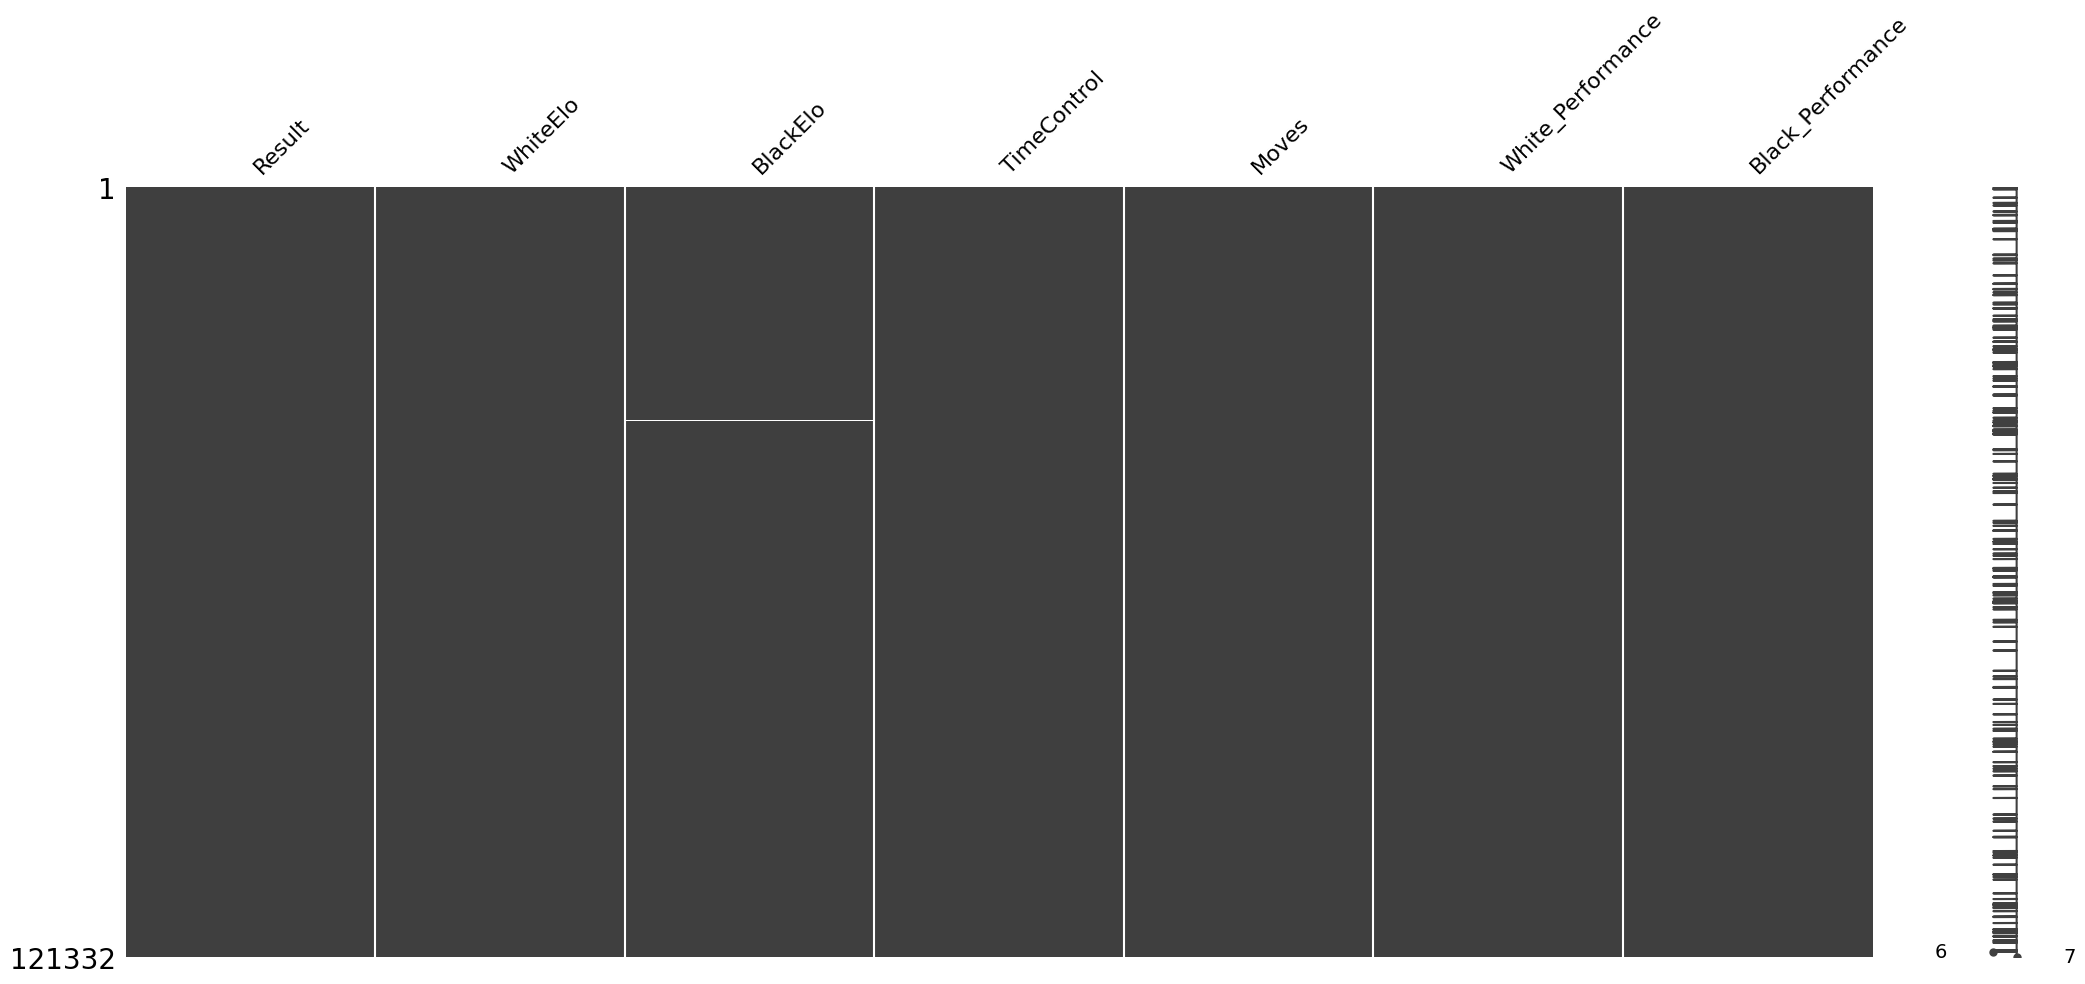

In [6]:
#Replace 'Unknown' and '?' with NaN to know which values are missing
df.replace(['Unknown', '?'], np.nan, inplace=True)

#Use missingno to visualize
mso.matrix(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121114 entries, 0 to 121331
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Result             121114 non-null  object
 1   WhiteElo           121114 non-null  object
 2   BlackElo           121114 non-null  object
 3   TimeControl        121114 non-null  object
 4   Moves              121114 non-null  object
 5   White_Performance  121114 non-null  int64 
 6   Black_Performance  121114 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 7.4+ MB


<Axes: >

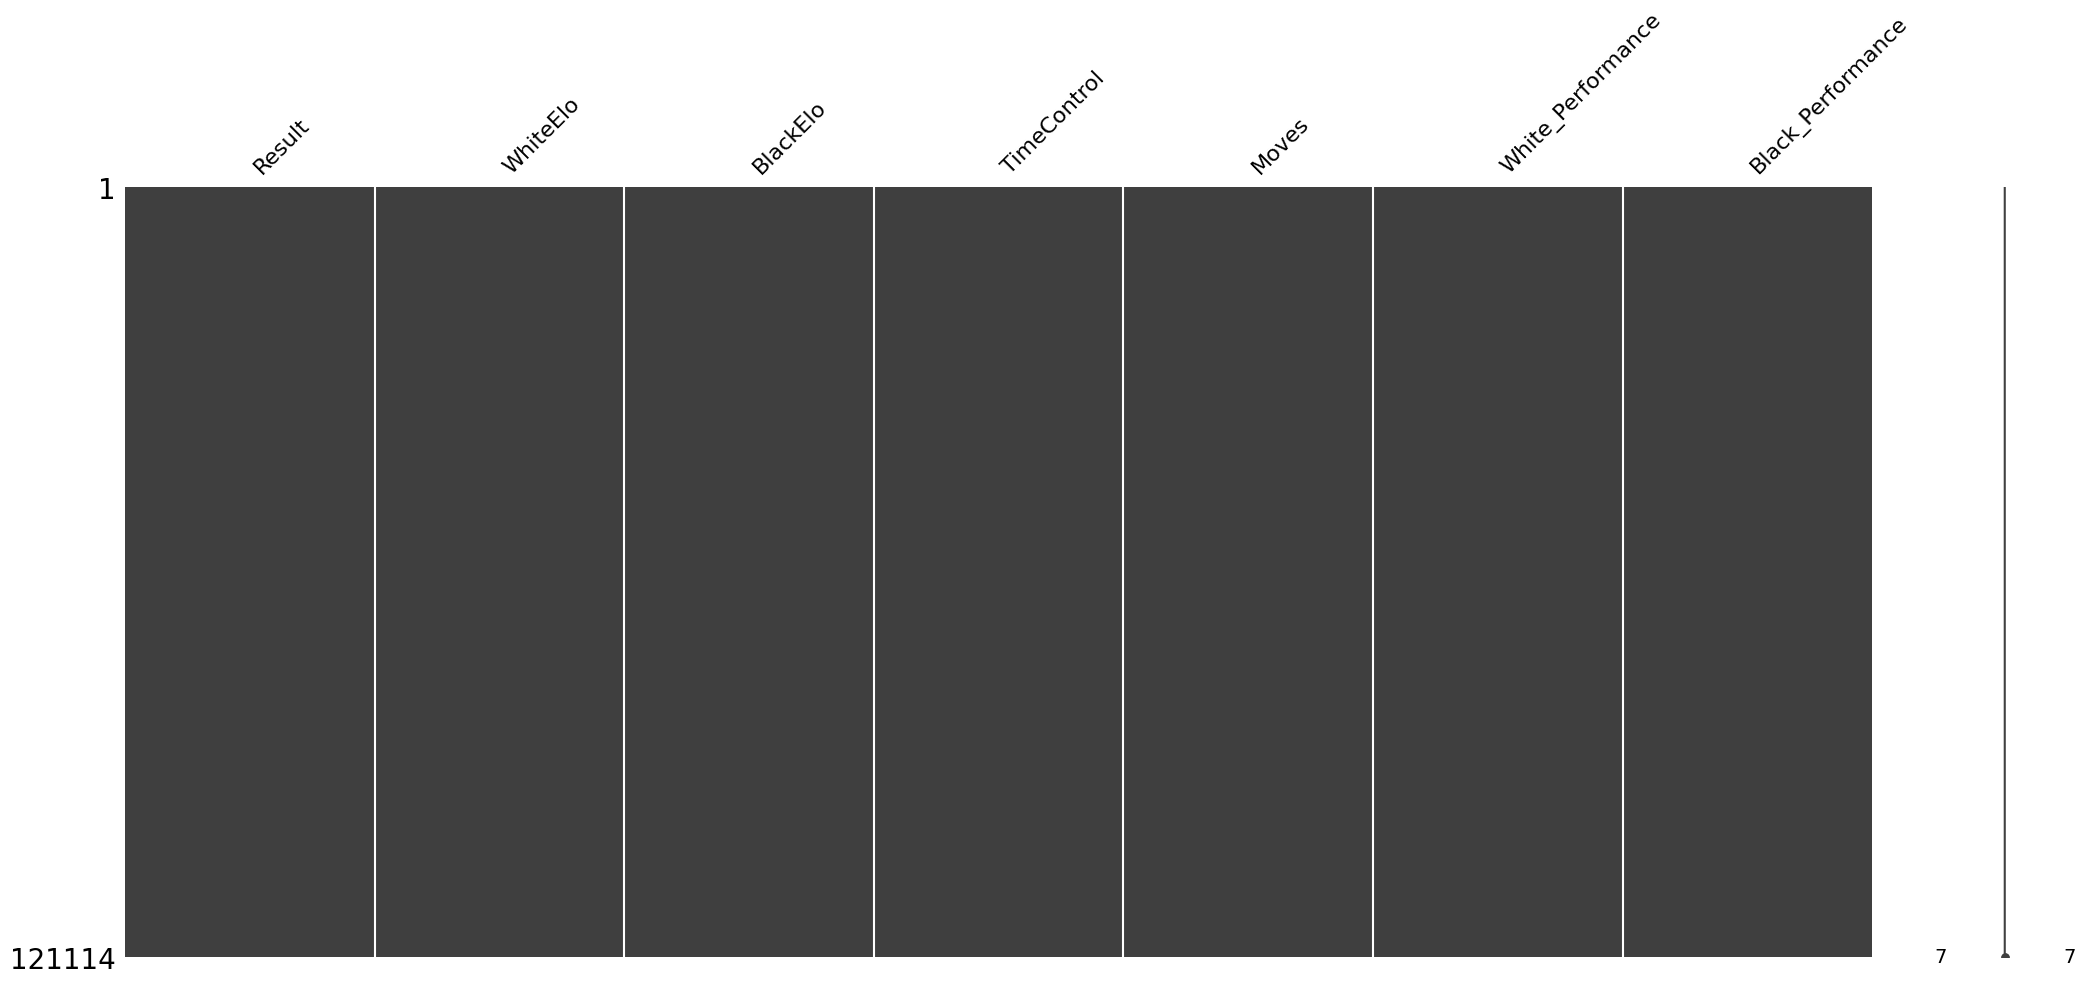

In [7]:
#Drop rows with NaN values
df_clean = df.dropna()

df_clean.info()
mso.matrix(df_clean)

In [8]:
duplicados = df_clean[df_clean.duplicated()]

duplicados

,Result,WhiteElo,BlackElo,TimeControl,Moves,White_Performance,Black_Performance
28289,1-0,1463,1446,420+1,"['e4', 'e5', 'Bc4', 'Nc6', 'd3', 'Nd4', 'Ne2',...",46,54
40850,1-0,1665,1379,60+0,"['h4', 'a5']",45,55
40861,0-1,1271,1706,60+0,"['h4', 'a5']",45,55
43207,1-0,1755,1500,120+0,"['h4', 'a5', 'g4']",46,54
43260,0-1,1385,1814,60+0,"['h4', 'a5']",45,55
43286,0-1,1090,1319,300+8,"['h4', 'a5']",45,55
61035,1-0,1505,980,120+4,"['e4', 'a6']",46,54
64440,0-1,1091,1322,600+8,"['a3', 'e5']",45,55
67861,0-1,1500,1562,0+1,"['e4', 'b6']",46,54
118915,0-1,1607,1565,60+2,"['h3', 'e5']",45,55


In [9]:
df_clean['WhiteElo'] = pd.to_numeric(df['WhiteElo'])
df_clean['BlackElo'] = pd.to_numeric(df['BlackElo'])

C:\Users\enriq\AppData\Local\Temp\ipykernel_18116\1504258183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WhiteElo'] = pd.to_numeric(df['WhiteElo'])
C:\Users\enriq\AppData\Local\Temp\ipykernel_18116\1504258183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['BlackElo'] = pd.to_numeric(df['BlackElo'])


In [10]:

df_clean.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Result,121114,3,1-0,62009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WhiteElo,121114.0,NaN,NaN,NaN,1605.973422,202.882684,782.0,1474.0,1602.0,1739.0,2403.0
BlackElo,121114.0,NaN,NaN,NaN,1595.823183,208.041085,789.0,1463.0,1588.0,1732.0,2386.0
TimeControl,121114,394,60+0,14523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Moves,121114,120308,"['e4', 'e5']",78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White_Performance,121114.0,NaN,NaN,NaN,46.075945,2.762098,20.0,45.0,46.0,47.0,76.0
Black_Performance,121114.0,NaN,NaN,NaN,53.924072,2.762083,24.0,53.0,54.0,55.0,80.0


In [11]:
df_clean["Result"] = df_clean["Result"].replace({'1-0':0, '0-1':1, '1/2-1/2':2 })

C:\Users\enriq\AppData\Local\Temp\ipykernel_18116\416920567.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean["Result"] = df_clean["Result"].replace({'1-0':0, '0-1':1, '1/2-1/2':2 })
C:\Users\enriq\AppData\Local\Temp\ipykernel_18116\416920567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Result"] = df_clean["Result"].replace({'1-0':0, '0-1':1, '1/2-1/2':2 })


In [12]:
df_clean.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Result,121114.0,NaN,NaN,NaN,0.520757,0.561305,0.0,0.0,0.0,1.0,2.0
WhiteElo,121114.0,NaN,NaN,NaN,1605.973422,202.882684,782.0,1474.0,1602.0,1739.0,2403.0
BlackElo,121114.0,NaN,NaN,NaN,1595.823183,208.041085,789.0,1463.0,1588.0,1732.0,2386.0
TimeControl,121114,394,60+0,14523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Moves,121114,120308,"['e4', 'e5']",78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White_Performance,121114.0,NaN,NaN,NaN,46.075945,2.762098,20.0,45.0,46.0,47.0,76.0
Black_Performance,121114.0,NaN,NaN,NaN,53.924072,2.762083,24.0,53.0,54.0,55.0,80.0


In [13]:
df_clean['Moves'] = df_clean['Moves'].apply(ast.literal_eval)

C:\Users\enriq\AppData\Local\Temp\ipykernel_18116\1089148071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Moves'] = df_clean['Moves'].apply(ast.literal_eval)


In [14]:
df_clean = df_clean[df_clean["Moves"].apply(lambda x: len(x) >= 10)]

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119050 entries, 0 to 121331
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Result             119050 non-null  int64  
 1   WhiteElo           119050 non-null  float64
 2   BlackElo           119050 non-null  float64
 3   TimeControl        119050 non-null  object 
 4   Moves              119050 non-null  object 
 5   White_Performance  119050 non-null  int64  
 6   Black_Performance  119050 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 7.3+ MB


In [ ]:
df_clean.info()

In [16]:
df_clean["TimeControl"].unique

<bound method Series.unique of 0          600+8
1          480+2
2         420+17
3           60+1
4           60+1
           ...  
121327    600+10
121328     720+0
121329     960+6
121330     180+1
121331     300+0
Name: TimeControl, Length: 119050, dtype: object>

In [ ]:
df_clean['TimeControl'] = pd.factorize(df['TimeControl'])